In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Load the dataset to inspect its structure
tweet_data = pd.read_csv('../data_file/tweet_sentiments.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
tweet_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [2]:
# Get a summary of the dataset, including data types and non-null counts
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [3]:
tweet_data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [4]:
# Display a summary of the missing values
tweet_data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

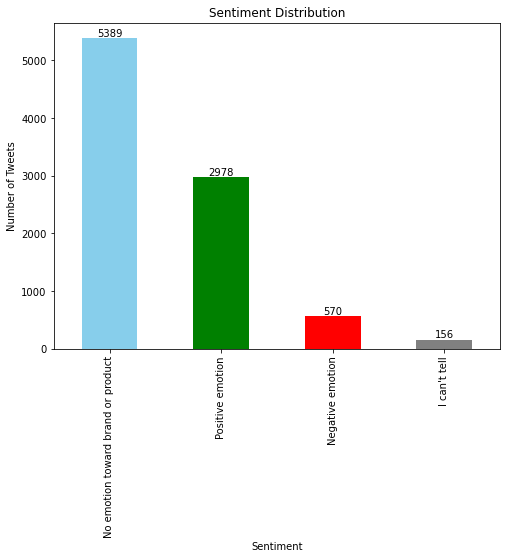

In [5]:
# Check the distribution of the sentiment
sentiment_distribution = tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color=['skyblue', 'green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


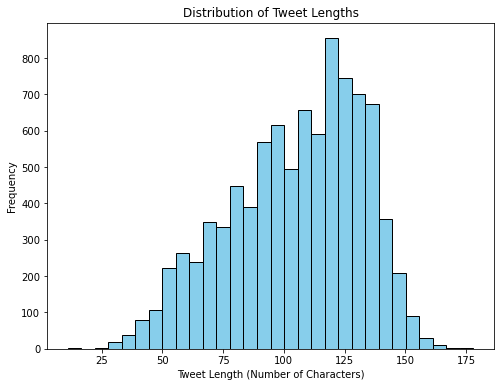

In [6]:
# Analyze the text length by calculating the number of characters in each tweet
tweet_lengths = tweet_data['tweet_text'].str.len()

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Count common words in the tweet_text
# Clean the tweet_text by dropping rows with missing text values
tweet_data_cleaned = tweet_data.dropna(subset=['tweet_text'])

# Tokenize the cleaned tweets by sentiment
positive_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['tweet_text'].str.split()
negative_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['tweet_text'].str.split()
neutral_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']['tweet_text'].str.split()

# Flatten the tokenized tweets into a single list per sentiment
positive_words = [word.lower() for tweet in positive_tweets for word in tweet if word]
negative_words = [word.lower() for tweet in negative_tweets for word in tweet if word]
neutral_words = [word.lower() for tweet in neutral_tweets for word in tweet if word]

# Count the most common words in each sentiment
positive_common_words = Counter(positive_words).most_common(10)
negative_common_words = Counter(negative_words).most_common(10)
neutral_common_words = Counter(neutral_words).most_common(10)

positive_common_words, negative_common_words, neutral_common_words

([('#sxsw', 2506),
  ('@mention', 2062),
  ('the', 1578),
  ('{link}', 1202),
  ('to', 1146),
  ('at', 999),
  ('rt', 913),
  ('for', 904),
  ('ipad', 793),
  ('a', 777)],
 [('#sxsw', 512),
  ('the', 300),
  ('@mention', 292),
  ('to', 255),
  ('is', 159),
  ('a', 151),
  ('ipad', 140),
  ('at', 137),
  ('rt', 137),
  ('of', 131)],
 [('#sxsw', 4680),
  ('@mention', 4249),
  ('{link}', 2904),
  ('the', 2409),
  ('to', 2112),
  ('at', 1868),
  ('rt', 1814),
  ('for', 1474),
  ('a', 1281),
  ('google', 1187)])

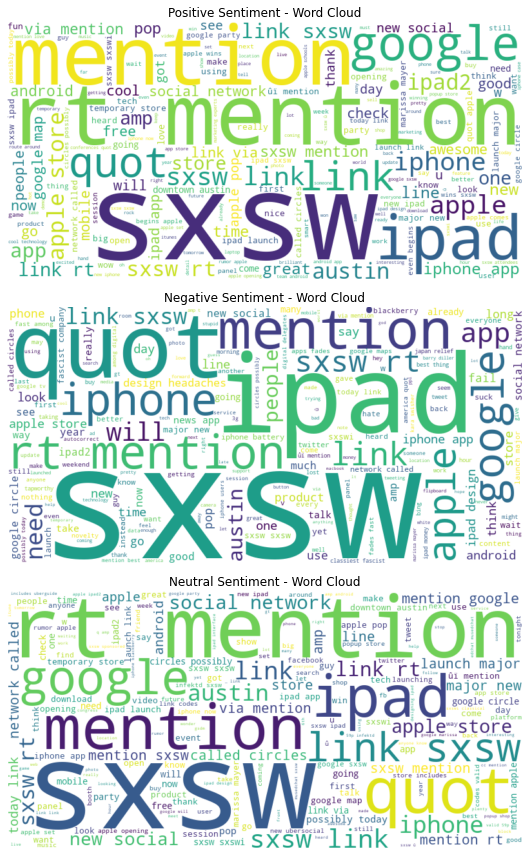

In [8]:
# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words))

# Plot the word clouds for each sentiment
plt.figure(figsize=(16, 12))

# Positive sentiment word cloud
plt.subplot(3, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment - Word Cloud')

# Negative sentiment word cloud
plt.subplot(3, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment - Word Cloud')

# Neutral sentiment word cloud
plt.subplot(3, 1, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment - Word Cloud')

plt.tight_layout()
plt.show()

In [10]:
# Clean the data
# Drop rows with missing tweet_text and drop the column 'emotion_in_tweet_is_directed_at' as it is not necessary for sentiment analysis
cleaned_tweet_data = tweet_data.dropna(subset=['tweet_text']).drop(columns=['emotion_in_tweet_is_directed_at'])

# Display the cleaned dataset for further inspection
cleaned_tweet_data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [11]:
# Cross-checking that there are no missing values
missing_values = cleaned_tweet_data.isnull().sum()

missing_values

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [12]:
# Perform text-processing
# Import necessary libraries for text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'tweet_text' column
cleaned_tweet_data['cleaned_text'] = cleaned_tweet_data['tweet_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
cleaned_tweet_data[['tweet_text', 'cleaned_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff fri sxsw marissa mayer g...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Perform feature engineering
# Filter the dataset for only positive and negative sentiments
binary_data = cleaned_tweet_data[cleaned_tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Prepare target variable (1 for positive, 0 for negative)
y_binary = binary_data['is_there_an_emotion_directed_at_a_brand_or_product'].apply(lambda x: 1 if x == 'Positive emotion' else 0)

# Split the binary dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_data['tweet_text'], y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Define the TF-IDF Vectorizer with a maximum of 5000 features and stop words removed
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same TF-IDF model
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Display the shapes of the resulting SMOTE-applied data
(X_train_smote.shape, y_train_smote.shape)

((4764, 5000), (4764,))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Penalty norm (L1 norm is typically supported with 'liblinear' or 'saga')
    'solver': ['liblinear', 'saga']  # Solvers compatible with penalty
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model found by GridSearchCV
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_best)
report_tuned = classification_report(y_test, y_pred_best, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after Tuning: {accuracy_tuned}")
print("Classification Report after Tuning:\n", report_tuned)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy after Tuning: 0.8816901408450705
Classification Report after Tuning:
               precision    recall  f1-score   support

    Negative       0.64      0.61      0.62       114
    Positive       0.93      0.93      0.93       596

    accuracy                           0.88       710
   macro avg       0.78      0.77      0.78       710
weighted avg       0.88      0.88      0.88       710



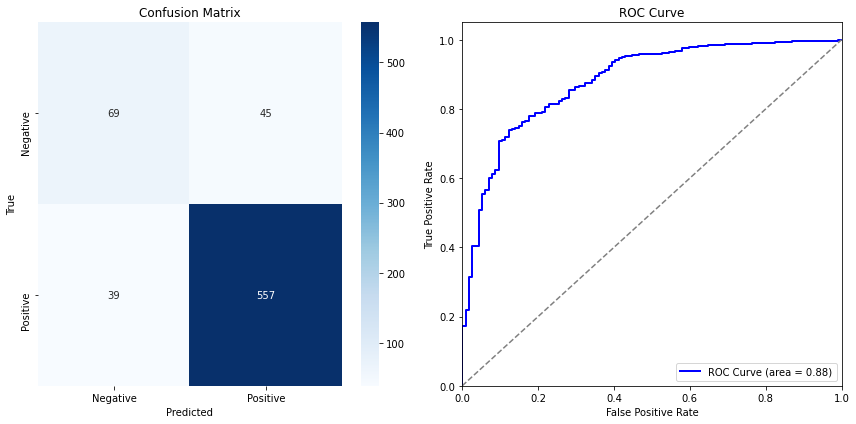

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

# Step 1: Confusion Matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Step 2: AUC-ROC Curve
# Logistic Regression gives decision function outputs (confidence scores) for calculating ROC
y_proba = best_logreg.predict_proba(X_test_tfidf)[:, 1]  # Get probabilities for the positive class

# Compute false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Step 3: Plot Confusion Matrix and ROC Curve on the Same Graph
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax[0])
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

# ROC Curve Plot
ax[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_title("ROC Curve")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend(loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']   # Number of features to consider at each split
}

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up GridSearchCV with 3-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters: {best_params_rf}")

# Train the best model found by GridSearchCV
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_best_rf)
report_tuned_rf = classification_report(y_test, y_pred_best_rf, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after Tuning: {accuracy_tuned_rf}")
print("Classification Report after Tuning:\n", report_tuned_rf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy after Tuning: 0.8887323943661972
Classification Report after Tuning:
               precision    recall  f1-score   support

    Negative       0.95      0.32      0.48       114
    Positive       0.89      1.00      0.94       596

    accuracy                           0.89       710
   macro avg       0.92      0.66      0.71       710
weighted avg       0.90      0.89      0.86       710



In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
    'gamma': [0.01, 0.1, 1, 10]  # Kernel coefficient for non-linear kernels
}

# Initialize the SVM model
svm_model = SVC(class_weight='balanced', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_svm = grid_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

# Train the best model found by GridSearchCV
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_tfidf)

# Evaluate the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
report_svm = classification_report(y_test, y_pred_best_svm, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after SVM Tuning: {accuracy_svm}")
print("Classification Report after SVM Tuning:\n", report_svm)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy after SVM Tuning: 0.8901408450704226
Classification Report after SVM Tuning:
               precision    recall  f1-score   support

    Negative       0.81      0.41      0.55       114
    Positive       0.90      0.98      0.94       596

    accuracy                           0.89       710
   macro avg       0.85      0.70      0.74       710
weighted avg       0.88      0.89      0.87       710



In [21]:
# Filter relevant rows and map sentiment labels to numerical categories
multiclass_data = cleaned_tweet_data[cleaned_tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion', 'No emotion toward brand or product'])]

# Define the target variable (sentiment)
y_multiclass = multiclass_data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0,
    'No emotion toward brand or product': 2
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(multiclass_data['tweet_text'], y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass)

# Define the TF-IDF Vectorizer with a maximum of 5000 features and stop words removed
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Fit and transform the training text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same TF-IDF model
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Display the shapes of the resulting SMOTE-applied data
(X_train_smote.shape, y_train_smote.shape)

((12930, 5000), (12930,))

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Multinomial Naive Bayes model
nb = MultinomialNB()

# Define a grid of parameters to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Try different smoothing parameters
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or assume uniform
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'])

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Accuracy: 0.6135346756152126
Classification Report:
               precision    recall  f1-score   support

    Negative       0.32      0.50      0.39       114
    Positive       0.51      0.66      0.58       596
     Neutral       0.77      0.60      0.67      1078

    accuracy                           0.61      1788
   macro avg       0.53      0.59      0.55      1788
weighted avg       0.65      0.61      0.62      1788



In [23]:

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the Naive Bayes and Random Forest models
nb = MultinomialNB(alpha=0.1, fit_prior=True)  # Tuned Naive Bayes with best alpha
rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)  # Tuned Random Forest

# Create a Voting Classifier (soft voting)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('nb', nb)], voting='soft')

# Fit the Voting Classifier on the SMOTE-balanced training data
voting_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test_tfidf)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'])

# Display the evaluation metrics
print(f"Ensemble Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Ensemble Model Accuracy: 0.6778523489932886
Classification Report:
               precision    recall  f1-score   support

    Negative       0.44      0.43      0.43       114
    Positive       0.59      0.62      0.60       596
     Neutral       0.76      0.74      0.75      1078

    accuracy                           0.68      1788
   macro avg       0.59      0.59      0.59      1788
weighted avg       0.68      0.68      0.68      1788



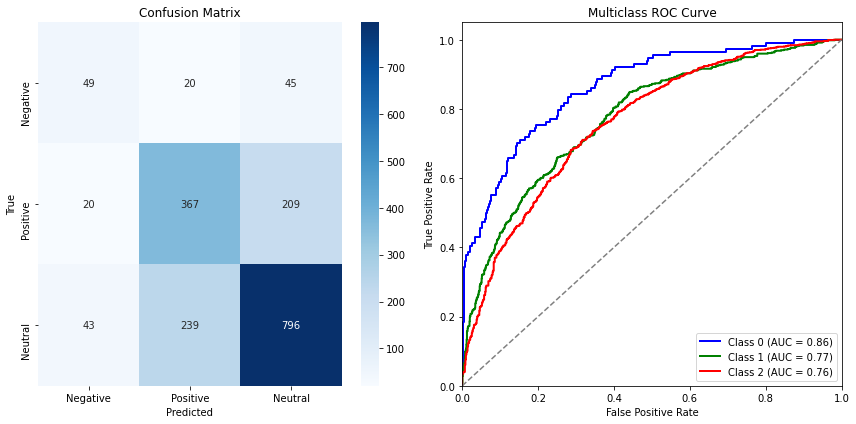

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Step 1: Confusion Matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: AUC-ROC for Multiclass
# We need to binarize the output for the ROC curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 0: Negative, 1: Positive, 2: Neutral
y_pred_proba = voting_clf.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot Confusion Matrix and AUC-ROC Curve on the Same Graph
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'], ax=ax[0])
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

# ROC Curve Plot
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    ax[1].plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_title("Multiclass ROC Curve")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend(loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()